In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import torch
from utils.data_loader import get_loader
from models.networks import Generator
import numpy as np
import matplotlib.pyplot as plt

def tensor2np(tensor):
    return np.transpose(tensor.cpu().data.numpy(), (1, 2, 0))

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
eps = 1e-7

In [3]:
G = Generator().to(device)
G.load_state_dict(torch.load('./models/weights/G.pth'))

<All keys matched successfully>

In [4]:
loader = get_loader(batch_size=4, train=False)
total_iter = len(loader)
data_iter = iter(loader)

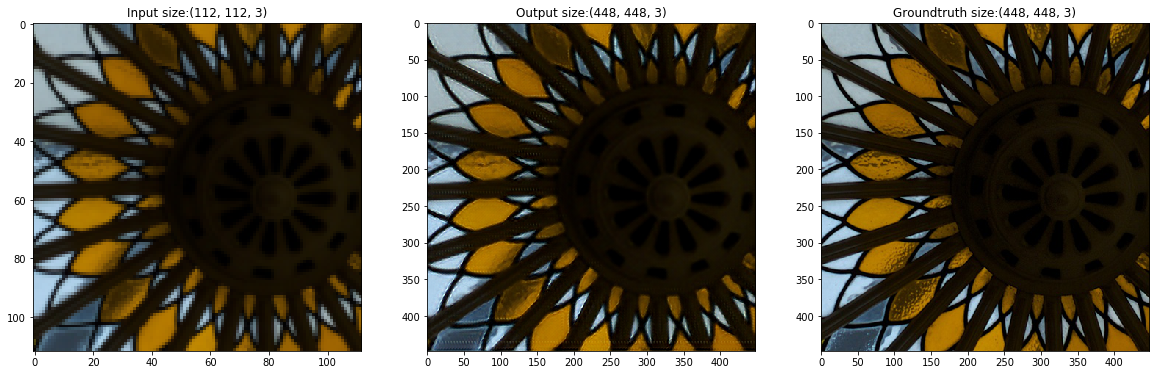

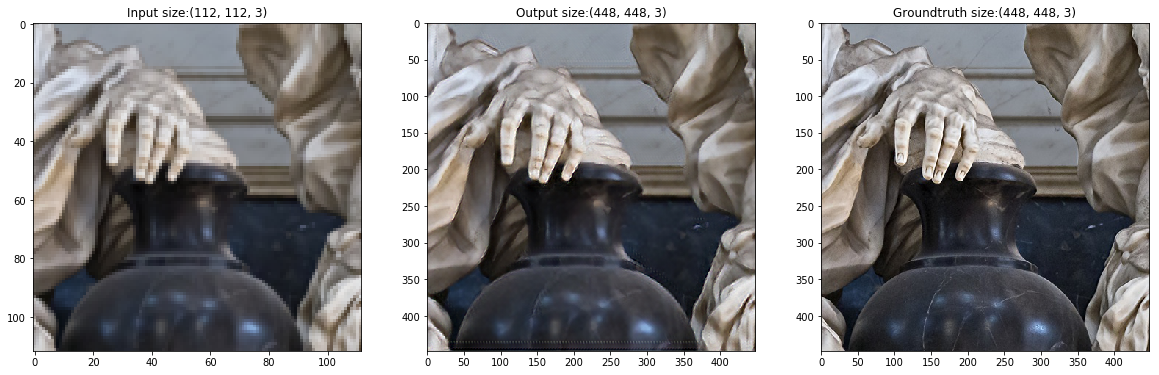

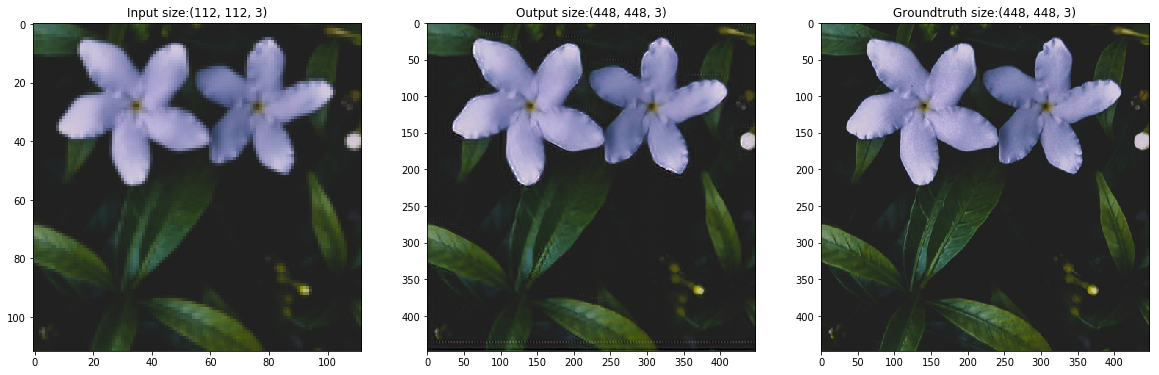

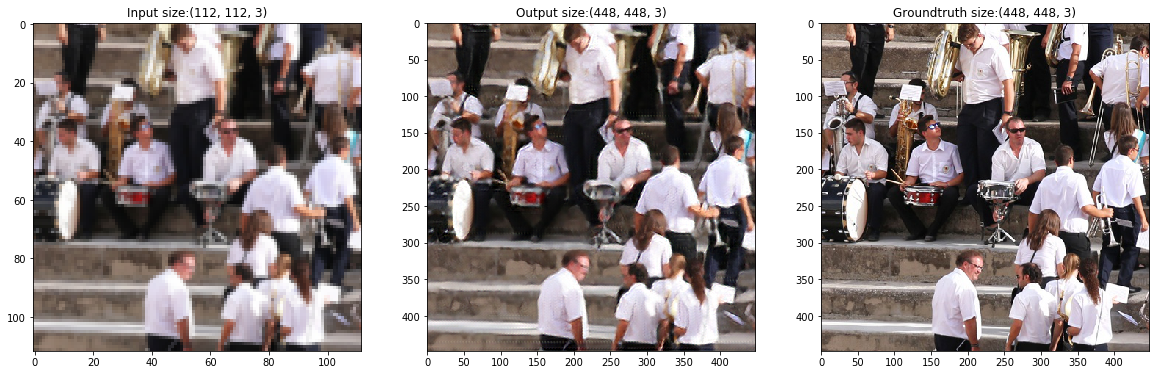

In [5]:
lr, hr = next(data_iter)
lr = lr.to(device)
hr = hr.to(device)
sr = G(lr)

val_batch = sr.shape[0]

for i in range(val_batch):
    lr_ = tensor2np(lr[i])
    sr_ = tensor2np(sr[i])
    hr_ = tensor2np(hr[i])
    
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.imshow(lr_)
    plt.title(f'Input size:{lr_.shape}')
    plt.subplot(1,3,2)
    plt.imshow(sr_)
    plt.title(f'Output size:{sr_.shape}')
    plt.subplot(1,3,3)
    plt.imshow(hr_)
    plt.title(f'Groundtruth size:{hr_.shape}')